In [43]:
import numpy as np
import pandas as pd

### Cyclists

In [44]:
cyclists_helsinki = pd.read_csv('data/cyclists-helsinki.csv')
cyclists_espoo = pd.read_csv('data/cyclists-espoo.csv')

cyclists_data = pd.merge(cyclists_helsinki, cyclists_espoo, on='date', how='outer')
cyclists_data.head()

,date,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Gallen-Kallela,Länsiväylä,Länsituulenkuja
0,2014-01-01,129.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,546.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,259.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-05,230.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
result = cyclists_data.iloc[:, 1:].sum()
result = result.sort_values(ascending=False)
result = result.reset_index()
result.columns = ['location', 'cyclists']
result.iloc[0, 1]

4839490.0

In [46]:
# total number of observation days
print("Total observed days:", cyclists_data.shape[0])

# number of observation days per street
result = cyclists_data.iloc[:, 1:].notna().sum()
result.sort_values(ascending=False)

# number of days with simultaneous observations on all streets
print("Total simultaneously observed days:", cyclists_data.dropna().shape[0])

# the busiest street in terms of the total number of cyclists
result = cyclists_data.iloc[:, 1:].sum()
result = result.sort_values(ascending=False)
result = result.reset_index()
result.columns = ['location', 'cyclists']
street, cyclists = result.iloc[0]
print("The busiest street:",  street, "with", int(cyclists), "cyclists")

# trying that with filtering nan values
new_data = cyclists_data.dropna()
result = new_data.iloc[:, 1:].sum()
result = result.sort_values(ascending=False)
result = result.reset_index()
result.columns = ['location', 'cyclists']
street, cyclists = result.iloc[0]

print("The busiest street:",  street, "with", int(cyclists), "cyclists")

Total observed days: 3134
Total simultaneously observed days: 1400
The busiest street: Merikannontie with 4839490 cyclists
The busiest street: Kaivokatu with 3016688 cyclists


### Human heights

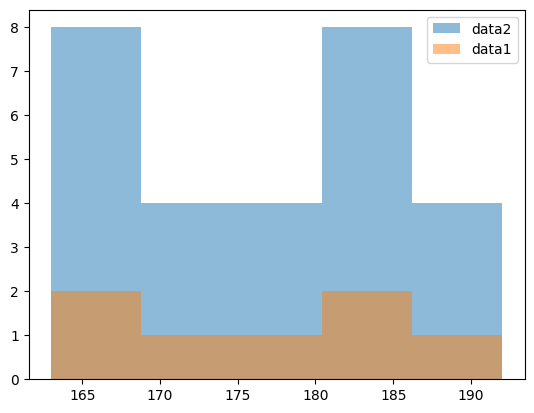

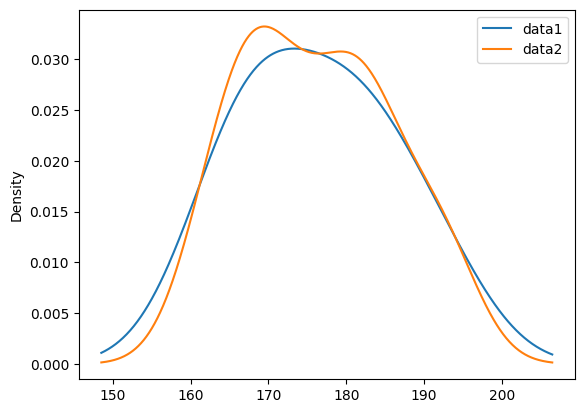

Statistics=0.976, p=0.939
Sample 1 looks Gaussian (fail to reject H0)
Statistics=0.919, p=0.033
Sample 2 does not look Gaussian (reject H0)
176.28571428571428 176.28571428571428
Statistics=0.000, p=1.000
Same distributions (fail to reject H0)


In [47]:
import matplotlib.pyplot as plt

data1 = [170, 192, 184, 168, 176, 181, 163]
data2 = [170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 168, 168, 168, 168, 176, 176, 176, 176, 181, 181, 181, 181, 163, 163, 163, 163]

# histograms 
plt.hist(data2, bins=5, alpha=0.5, label='data2')
plt.hist(data1, bins=5, alpha=0.5, label='data1')
plt.legend(loc='upper right')
plt.show()

# density plots
plt.figure()
pd.Series(data1).plot.kde()
pd.Series(data2).plot.kde()
plt.legend(['data1', 'data2'])
plt.show()

# based only on the plots, data 1 is showing a normal distribution, while data 2 is showing a bimodal distribution
# the datasets contain similar values, and distributions are different, that is because of the number of observations which are focused around 170 and 180c

# Shapiro-Wilk Test
# The Shapiro-Wilk test is used to determine if a data sample has a Gaussian distribution.
# The null hypothesis of the test is that the data is normally distributed.
# If the p-value is less than the significance level, we reject the null hypothesis.
# If the p-value is greater than the significance level, we fail to reject the null hypothesis.

from scipy.stats import shapiro

# normality test
stat, p = shapiro(data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample 1 looks Gaussian (fail to reject H0)')
else:
    print('Sample 1 does not look Gaussian (reject H0)')

stat, p = shapiro(data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample 2 looks Gaussian (fail to reject H0)')
else:
    print('Sample 2 does not look Gaussian (reject H0)')

# The two-sample t-test is used to determine if two population means are equal.
# The null hypothesis is that the two means are equal.
# If the p-value is less than the significance level, we reject the null hypothesis.
# If the p-value is greater than the significance level, we fail to reject the null hypothesis.

from scipy.stats import ttest_ind
print(np.mean(data1), np.mean(data2))

# t-test
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

### World temperature

In [48]:
world_data = pd.read_csv('data/global-temperature.csv')

print("Mean:", world_data["No_Smoothing"].mean())
print("Median:", world_data["No_Smoothing"].median())

world_data.head()


Mean: 0.0657638888888889
Median: -0.045


,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24


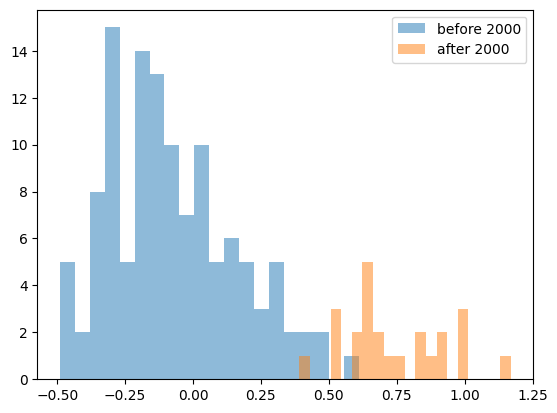

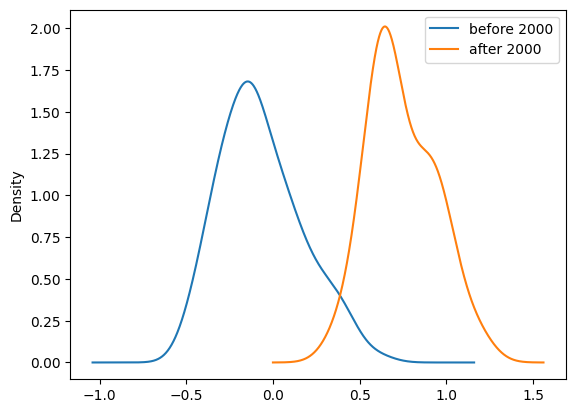

Statistics=0.972, p=0.012
Sample 1 does not look Gaussian (reject H0)
Statistics=0.956, p=0.369
Sample 2 looks Gaussian (fail to reject H0)
-0.06975 0.7433333333333333
Statistics=-15.922, p=0.000
Different distributions (reject H0)


In [49]:
data_before_2000 = world_data.loc[world_data["Year"] < 2000, "No_Smoothing"]
data_after_2000 = world_data.loc[world_data["Year"] >= 2000, "No_Smoothing"]

# histograms
plt.hist(data_before_2000, bins=20, alpha=0.5, label='before 2000')
plt.hist(data_after_2000, bins=20, alpha=0.5, label='after 2000')
plt.legend(loc='upper right')
plt.show()

# density plots
plt.figure()
data_before_2000.plot.kde()
data_after_2000.plot.kde()
plt.legend(['before 2000', 'after 2000'])
plt.show()

# both of these seem to be left-skewed

# Shapiro-Wilk Test
# The Shapiro-Wilk test is used to determine if a data sample has a Gaussian distribution.
# The null hypothesis of the test is that the data is normally distributed.
# If the p-value is less than the significance level, we reject the null hypothesis.
# If the p-value is greater than the significance level, we fail to reject the null hypothesis.

from scipy.stats import shapiro

# normality test
stat, p = shapiro(data_before_2000)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample 1 looks Gaussian (fail to reject H0)')
else:
    print('Sample 1 does not look Gaussian (reject H0)')

stat, p = shapiro(data_after_2000)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample 2 looks Gaussian (fail to reject H0)')
else:
    print('Sample 2 does not look Gaussian (reject H0)')

# The two-sample t-test is used to determine if two population means are equal.
# The null hypothesis is that the two means are equal.
# If the p-value is less than the significance level, we reject the null hypothesis.
# If the p-value is greater than the significance level, we fail to reject the null hypothesis.

from scipy.stats import ttest_ind
print(np.mean(data_before_2000), np.mean(data_after_2000))

# t-test
stat, p = ttest_ind(data_before_2000, data_after_2000)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

### Electric bikes

In [50]:
bikes_data = pd.read_csv('data/bikes.data')

bikes_data.head()

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2


In [51]:
print(bikes_data['ticket'].unique())    

if True in bikes_data.cost < 0:
    print('There are negative values in cost column')

if set(bikes_data.month.unique()) > set(range(1, 13)):
    print('There are values in month column that are not in range 1-12')

bikes_data.duration.values.sort()
if bikes_data.duration.values[0] < 0:
    print('There are negative values in duration column')

bikes_data.distance.values.sort()
if bikes_data.distance.values[0] < 0:
    print('There are negative values in duration column')

if set(bikes_data.assistance.unique()) > set([0, 1]):
    print('There are values in assistance column that are not 0 or 1')

count = 0
for row in bikes_data.itertuples():
    if row.energy_collected > row.energy_used:
        count += 1

print("Number of rows where energy collected is greater than energy used: ", count)
print("Percentage of rows where energy collected is greater than energy used: ", count / bikes_data.shape[0] * 100)
print("Total number of rows: ", bikes_data.shape[0])

['single' 'savonia' 'season']
There are negative values in duration column
Number of rows where energy collected is greater than energy used:  241
Percentage of rows where energy collected is greater than energy used:  13.58511837655017
Total number of rows:  1774


Variables and their types
- ticket - categorical (discrete by default), nominal
- cost - numerical, continuous, ratio
- month - categorical (discrete by default), ordinal
- location_from - categorical (discrete by default), nominal
- location_to - categorical (discrete by default), nominal
- duration - numerical, continuous, ratio
- distance - numerical, continuous, ratio
- assistance - categorical (discrete by default), nominal, indicator
- energy_used - numerical, continuous, ratio